# Importing the libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Problem Statement

In  this data, we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks". You have train a SVR model to understand the relationship between the Hours of Study and Marks of the student to predict the student's marks based on their number of hours dedicated to studies.

# Importing the dataset

In [154]:
df = pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

# EDA

In [155]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [156]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [157]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [159]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [160]:
df.columns

Index(['Hours of Study', 'Marks'], dtype='object')

In [161]:
df.rename(columns={'Hours of Study':'Hours'},inplace=True)

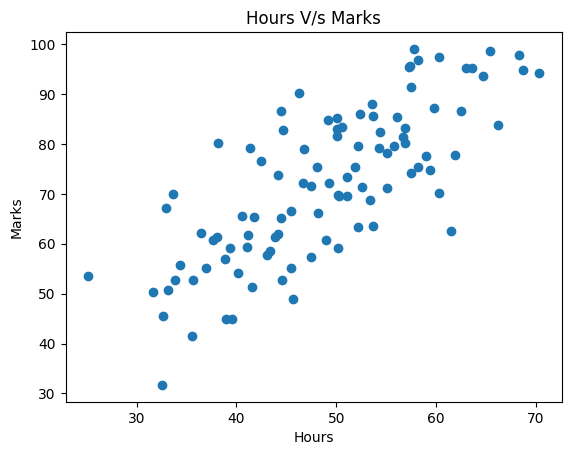

In [162]:
plt.scatter(df['Hours'],df['Marks'])
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Hours V/s Marks')
plt.show()

<Axes: >

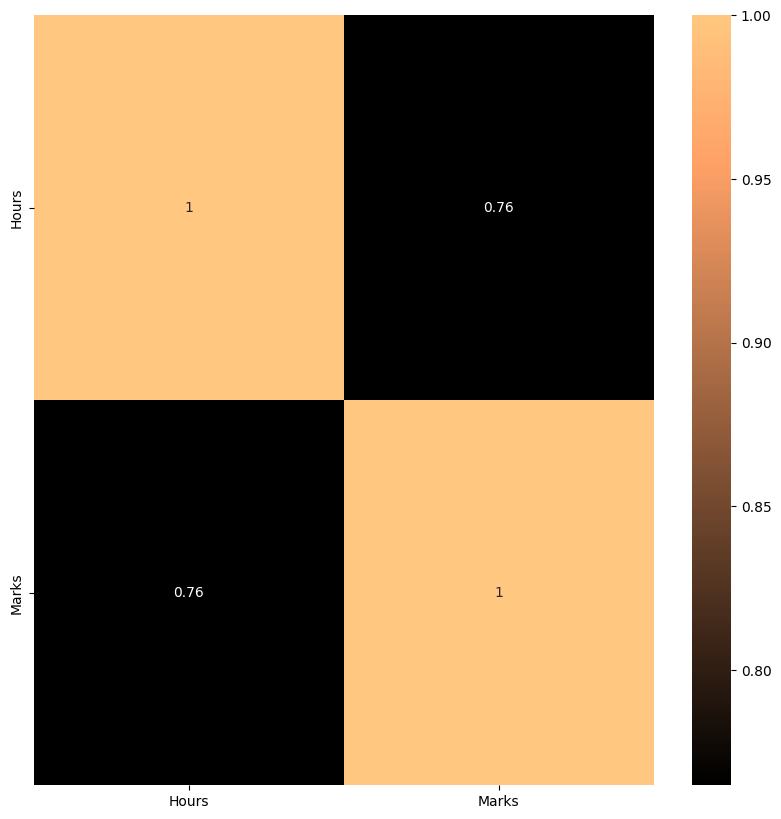

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='copper')

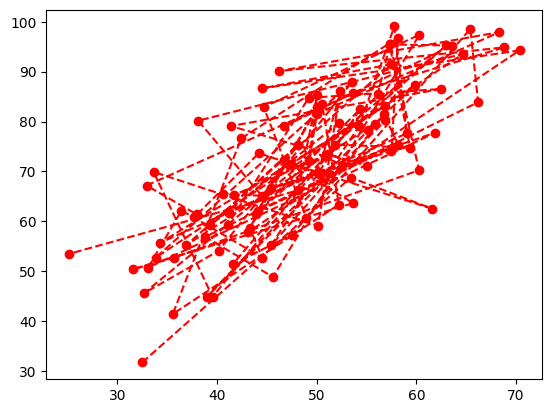

In [164]:
plt.plot(df['Hours'],df['Marks'],ls='--',marker='o',color='red')

# Feature Scalling

* Standardization
* Normalisation

In [165]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [166]:
x = df.iloc[:,:-1].values.reshape(-1,1)
y = df.iloc[:,-1].values.reshape(-1,1)

In [167]:
stanscale = StandardScaler()

In [168]:
x = stanscale.fit_transform(x)
y = stanscale.fit_transform(y)

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=10)

In [170]:
x_train.shape

(85, 1)

In [171]:
y_train.shape

(85, 1)

In [172]:
model = SVR(kernel='rbf')

In [173]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [174]:
y_pred = model.predict(x_test)

In [175]:
y_pred

array([-0.85042958,  0.66226224, -0.4110765 , -1.27434326,  0.60281549,
       -0.11742276, -0.83835668, -0.45781684, -1.05169407,  1.0423449 ,
        1.17688444,  0.3560123 , -0.64248024, -0.59541816,  0.0822111 ])

In [176]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [177]:
y_pred

array([[59.17324266],
       [82.0510354 ],
       [65.81797266],
       [52.76201657],
       [81.15196898],
       [70.25916098],
       [59.35583183],
       [65.1110766 ],
       [56.12933952],
       [87.79936568],
       [89.83412756],
       [77.41934325],
       [62.31824666],
       [63.03000861],
       [73.27840259]])

In [178]:
y_test = stanscale.inverse_transform(y_test)

Text(0.5, 1.0, 'Actual V/s Predicted output')

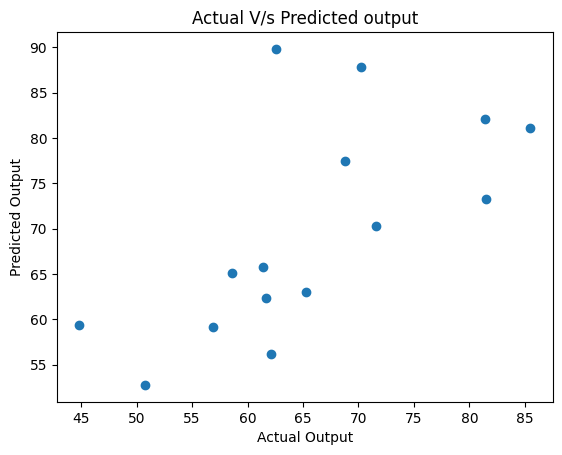

In [179]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual V/s Predicted output')

In [180]:
stanscale.inverse_transform(model.predict([[5]]).reshape(-1,1))

array([[72.1107352]])

In [181]:
model.score(x_test,y_test)

-35.89164207797212

In [182]:
r2_score(y_test,y_pred)

0.14483378667790192

In [183]:
mean_absolute_error(y_test,y_pred)

7.108661565952638

In [184]:
mean_squared_error(y_test,y_pred)

102.59431753955478